# Programming Exercise 10: Data Management

In this lab exercise, you will check the consistency of annotations for a selected set of images. You are provided with 10 images, and for each image there are a number of different judgements (a single judgement is one persons opinion about what the annotation should look like).  

For each image you have a corresponding .json file that contains all of the judgements for said image. The top-level key-value pairs of the .json file correspond to judgement_number - judgement. In turn, each judgement corresponds to a list of objects, where each object contains a number of different keys that inform you about the object-class, position of the extreme points (top, right, left, bottom) and so on. 


You will need the following libraries<br><br>
- **scipy**: For advanced mathematical routines <br>
- **numpy**: For N-dimensional array manipulation <br>
- **matplotlib**: For 2D plotting <br>
- **JSON**: For processing JSON file <br>


## Files included in this exercise:

- **Annotation_consistency**
    - images (in jpg format) 
    - jugements (also annotations in json format)

## Where to get help:

- **Working with pillow and matplotlib**:
    - images (imread,imshow): <https://matplotlib.org/tutorials/introductory/images.html>
    - patches.Rectangle: <https://matplotlib.org/3.3.0/api/_as_gen/matplotlib.patches.Rectangle.html>
    - pillow:<https://pillow.readthedocs.io/en/stable/reference/Image.html>
    
- **Working json**: 
    - Read json file: <https://realpython.com/python-json/#serializing-json>
    


In [1]:
# Manipulating directory paths 
import os
import random 
# Manipulating json files
import json

# Plotting library
import matplotlib.pyplot as plt

# Plotting  and manipulating image, bounding box
from matplotlib import image
import matplotlib.patches as patches
import matplotlib.cm as mpcm
import numpy as np

# For data analysis and data structures in DataFrames 
import pandas as pd

# tells matplotlib to embed plots within the notebook
%matplotlib inline


## Submission
For this programming exercise you are required to check the consistecy of annotations. The following is a breakdown of how each part of this exercise.  
- *Step 1: Draw all boxes from one single annotator onto one image*<br>
- *Step 2: Draw all boxes avalibale for the same image onto the image*<br>
- *Step 3: Pick two boxes corresponding to the same object and draw them together c*<br>
- *Step 4: Compute the IOU between them*<br>

# Annotation consistency

High quality data is important in machine learning. However, data quality can suffer as a result of manual labelling. Even when annotation guidelines are provided to human labelers, there labels can be inconsistent. One way to elvaluate quality of the labels is to evaluate the interrator agreement for the human labels. In the exercise you will compute intersection over uninion (IoU) on bouding boxes. IOU is an evaluation metric used to measure the accuracy of an object detector on a particular dataset.  <br>

## 1 Draw all boxes from one single annotator onto one image
In this first task, you will load an image and draw the bounding boxes provided by one annotator.

> **TASK 1.** Write code to load image and plot bounding boxes (annotations) onto the image:

> - Load image using Matplotlib library's `imread()` to load image in the form of an array of the pixel and `imshow()` to display the image 

> - Draw annotations (coordinates of bounding box) onto the image

In order to ensure modular code, you will first write functions to (1) load and display image and (2) draw a single bounding box onto image (3) draw more than one bounding box onto an image

### Loading image

You can load image by using Matplotlib library which relies on Pillow library to load image data. Pillow python library is a useful tool for loading and manipulating image. To load image, simply use `imread('PATH')` and `imshow()` functions of the matplotlib.image module. The `imread('PATH')` function assigns numpy array to a variable of which can be rendered with `imshow()` function. Python uses image data in form of NumPy array `[Height, Width, Channel]` format. Try printing the numpy array of the image.

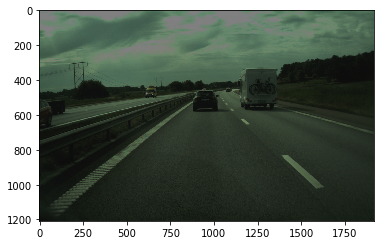

In [2]:
# Task 1 draw all boxes from one single annotator onto an image

## Loading image Example

path_dir = './annotation_consistency/' 
file_name = 'image1_FC_34243'

myImg = image.imread(path_dir+file_name+'.jpg')
plotted_image = plt.imshow(myImg)


### Drawing annotations (bouding box coordinates) onto image

You can draw bounding box using `Rectangle()` from *matplotlib.patches* class. The `Rectangle()` draws a rectangle whose dimensions are specified as its parameters `xy, width, height`. The `xy=(x,y)` parameter specifies the bottom and left rectangle coordinates. 

If you open annotations in the judgement JSON file, you will notice the following structure:
```json
"0": [
    {
      "boundaries": [
        {
          "boundaryPoints": [
            {
              "coords": [
                7.460422039031982,
                512.8555297851562
              ],
              "edge": "Bottom",
              "visible": true
            },
            {
              "coords": [
                0.6261528134346008,
                578.7573852539062
              ],
              "edge": "Left",
              "visible": true
            },
            {
              "coords": [
                51.3950080871582,
                667.11474609375
              ],
              "edge": "Top",
              "visible": true
            },
            {
              "coords": [
                74.82678985595703,
                581.6864013671875
              ],
              "edge": "Right",
              "visible": true
            }
          ],
          "cameraId": 0
        }
      ],
      "properties": {
        "ObjectID": 1
      },
      "selectionMethod": "outer_points",
      "type": "Vehicle"
    },
    ...
    ...
```
"0" denotes annotation entry from an annotator. The annotator has provided a number of bounding boxes (boundaries) whose coordinates are provided within the boundaryPoints. The coordinates are provided for the different edges (Bottom, Left, Top and Right) of the bounding box.  In order to draw the bounding box using `matplotlib.patches.Rectangle((x,  y), width, height)` you need to access the coordinates of each edge and get the correct parameters for the rectangle. 

Notice that coords are in a list of x,y (e.g., 74.82678985595703, 581.6864013671875). Therefore, you can assign all coords of x in one list and use them to get width by simply subtracting maximum value of x from the smallest value of x. Similarly, assign all y coords in order to compute the height. xy `matplotlib.patches.Rectangle((x,  y), width, height)`  value of the rectangle are the minimum values of x and y. 

<img src="annotation_consistency/box.png" alt="drawing" width="300"/>


#### Expected Answer

<img src="annotation_consistency/Task1.png" alt="drawing" width="300"/>

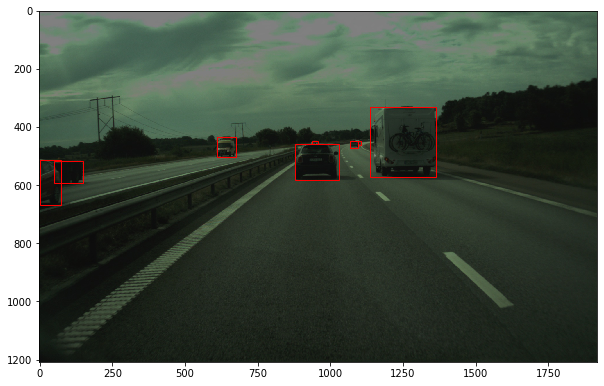

In [3]:
# Task 1 draw all boxes from one single annotator onto an image

# ======== Your Code ======== 

fig,ax = plt.subplots(figsize=(10,20)) 
plotted_image = plt.imshow(myImg)


with open(path_dir+file_name+'_judgements.json') as image_data:
    file_object = image_data.read()
    data = json.loads(file_object)
    
annotator = data.get('0')
for annotations in annotator:
    boxes_info = annotations.get('boundaries')
    for boundrypoint in boxes_info:
        points = boundrypoint.get('boundaryPoints')
        x_values = np.array([])
        y_values = np.array([])
        
        for coords in points:
            coordinates = coords.get('coords')
            x_values = np.append(x_values, coordinates[0])
            y_values = np.append(y_values, coordinates[1])
#             print(coordinates,'\n')
#         print('\n\n\n',x_values,y_values)
        minx = np.min(x_values)
        miny = np.min(y_values)
        width = np.max(x_values)-minx
        height= np.max(y_values)-miny
        rectangle = patches.Rectangle((minx,  miny), width, height , edgecolor='Red',facecolor = 'None')
        ax.add_patch(rectangle)


# ======== Your Code ======== 

## 2 Draw all boxes avalibale for the same image onto the imagee
In this second task, you will draw all the bounding boxes provided by all annotators onto the single image.
> **TASK 2.** Write code to draw all annotations available for an image. Note, you need to make small modification to above task

#### Expected Answer

<img src="annotation_consistency/Task2.png" alt="drawing" width="300"/>

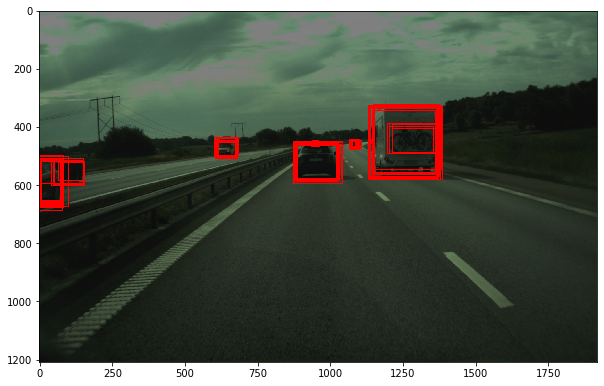

In [4]:
# Task 2 draw all boxes from all annotators onto an image 

# ======== Your Code ======== 

fig,ax = plt.subplots(figsize=(10,20)) 
plotted_image = plt.imshow(myImg)

number_of_annotators = len(data)
for i in range(number_of_annotators):
    annotator = data.get(str(i))
    for annotations in annotator:
        boxes_info = annotations.get('boundaries')
        for boundrypoint in boxes_info:
            points = boundrypoint.get('boundaryPoints')
            x_values = np.array([])
            y_values = np.array([])

            for coords in points:
                coordinates = coords.get('coords')
                x_values = np.append(x_values, coordinates[0])
                y_values = np.append(y_values, coordinates[1])
    #             print(coordinates,'\n')
    #         print('\n\n\n',x_values,y_values)
            minx = np.min(x_values)
            miny = np.min(y_values)
            width = np.max(x_values)-minx
            height= np.max(y_values)-miny
            rectangle = patches.Rectangle((minx,  miny), width, height , edgecolor='Red',facecolor = 'None')
            ax.add_patch(rectangle)




# ======== Your Code ======== 

## 1.3 Pick two annotators and draw their annotations onto an image 
In this task, you will select two annotators and draw the bounding boxes provided by the two annotators on a single image

> **TASK 3.** Write code to draw annotations available from two annotations onto an image.

#### Expected Answer

<img src="annotation_consistency/Task3.png" alt="drawing" width="300"/>

,x1,x2,x3,x4,y1,y2,y3,y4
8,11.777209,80.299156,58.130287,3.715804,505.247772,569.739014,658.414490,585.861816
4,13.013353,70.593430,29.464804,0.674766,509.404114,575.209900,649.241455,583.435608
3,642.281311,615.547668,673.127747,634.055603,449.767609,470.331909,484.726929,499.121948
7,642.582153,600.259766,636.536133,682.889160,434.710480,470.986816,499.201721,473.002167
5,952.946289,876.362915,958.992310,1035.575684,458.894684,515.324524,573.769714,497.186371
1,1018.608215,946.633118,884.940186,956.915283,525.855530,460.049744,529.968445,581.379211
2,1265.380005,1152.276245,1362.032227,1283.887817,340.776764,460.049744,447.711182,562.871338
6,1269.356445,1148.435303,1263.310303,1374.154663,321.850800,450.833282,569.739014,426.649078


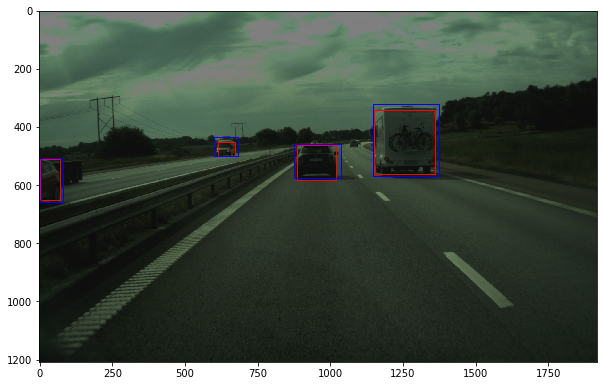

In [5]:
# Task 3 draw all boxes from two annotators onto an image
# ======== Your Code ======== 

random_selected_int = np.array([5,9])

fig,ax = plt.subplots(figsize=(10,20)) 
plotted_image = plt.imshow(myImg)

ann_x_coord = np.array([[0,0,0,0]])
ann_y_coord = np.array([[0,0,0,0]])

for i in range(random_selected_int.size):
    annotator = data.get(str(random_selected_int[i]))
    for annotations in annotator:
        boxes_info = annotations.get('boundaries')
        for boundrypoint in boxes_info:
            points = boundrypoint.get('boundaryPoints')
            x_values = np.array([])
            y_values = np.array([])

            for coords in points:
                coordinates = coords.get('coords')
                x_values = np.append(x_values, coordinates[0])
                y_values = np.append(y_values, coordinates[1])
                
            minx = np.min(x_values)
            miny = np.min(y_values)
            width = np.max(x_values)-minx
            height= np.max(y_values)-miny
            if i==0:
                rectangle = patches.Rectangle((minx,  miny), width, height , edgecolor='Red',facecolor = 'None')
            elif i==1:
                rectangle = patches.Rectangle((minx,  miny), width, height , edgecolor='Blue',facecolor = 'None')

            ax.add_patch(rectangle)
#             print(np.array(x_values))

            ann_x_coord = np.append(ann_x_coord, np.array([x_values]),axis=0)
            ann_y_coord = np.append(ann_y_coord, np.array([y_values]),axis=0)

#creating pandas dataframe from numpy arrays for next task

xTable = pd.DataFrame(data=ann_x_coord, index=['0','1','2','3','4','5','6','7','8'], columns= ['x1','x2','x3','x4'])
yTable = pd.DataFrame(data=ann_y_coord, index=['0','1','2','3','4','5','6','7','8'], columns= ['y1','y2','y3','y4'])

#sorting the pandas dataframe containing coordinates in the Ascending order
concatenated_table = pd.concat([xTable, yTable], axis=1, sort=False )
concatenated_table = concatenated_table.drop(concatenated_table.index[0])
concatenated_table = concatenated_table.sort_values(by='x1', ascending=True)
concatenated_table

# ======== Your Code ======== 

## 4 Compute the IOU between the annotations of the two annotators

In this last task, you will compute the IOU from the annotations of the two annotators

> **TASK 4.** Write code to compute IOU from two annotators on a single image

Task 1.3 should give you the coordinates of the the bounding box. Use the following image to get an idea of how you can compute area of intersection as well as the total area of overlap in order to compute IOU.

<img src="annotation_consistency/iou.png" alt="drawing" width="600"/>


In [6]:
# Task 4 Compute IOU for all boxes from two annotators onto a single image

# ======== Your Code ========  

concatenated_table

# ======== Your Code ======== 
counter = 0
annotation_counter = 0
r1_x = np.array([])
r1_y = np.array([])
r2_x = np.array([])
r2_y = np.array([])

#for loop for working on two tuples data cz each two rows contain data for 2 overlapping rectangles 
for row in concatenated_table.itertuples(index=False):
    
    if counter == 0:
        r1_x = np.append(r1_x,[row.x1,row.x2,row.x3,row.x4])
        r1_y = np.append(r1_y,[row.y1,row.y2,row.y3,row.y4])
        counter += 1
    else:
        annotation_counter += 1
        r2_x = np.append(r2_x,[row.x1,row.x2,row.x3,row.x4])
        r2_y = np.append(r2_y,[row.y1,row.y2,row.y3,row.y4])
        h1,h2 = (np.max(r1_y)- np.min(r1_y)) , (np.max(r2_y)- np.min(r2_y))
        w1,w2 = (np.max(r1_x)-np.min(r1_x)) , (np.max(r2_x)-np.min(r2_x))
        area_rect1 = w1 * h1
        area_rect2 = w2 * h2
#         print('\n\n','Heights : ',h1,h2)
#         print('Widths : ',w1,w2)
#         print('Areas : ',area_rect1,area_rect2,'\n\n')
        if (np.max(r1_x) <= np.min(r2_x) or np.min(r1_y)>=np.max(r2_y) or np.max(r2_x) <= np.min(r1_x) or np.min(r1_y)>=np.max(r1_y)):
            print('No Overlap')
        else:
            x_overlap = np.max([0, (np.min([np.max(r1_x), np.max(r2_x)]) - np.max([np.min(r1_x), np.min(r2_x)]))]);
            y_overlap = np.max([0, np.absolute((np.min([np.max(r1_y), np.max(r2_y)]) - np.max([np.min(r1_y), np.min(r2_y)])))]);
#             print(x_overlap,y_overlap)
            intersection_Area = x_overlap * y_overlap;
            combined_area = (area_rect1+area_rect2)-intersection_Area
            iou = intersection_Area/combined_area
            print('Annotation ',annotation_counter)
            print('Intersection Area : ', intersection_Area)
            print('Combined Area : ', combined_area)
            print('IOU : ', iou,'\n\n\n')
            
        
        #restart values for next Annotation
        r1_x = np.array([])
        r1_y = np.array([])
        r2_x = np.array([])
        r2_y = np.array([])
        counter = 0
        
        



# ======== Your Code ======== 

Annotation  1
Intersection Area :  9351.989371452291
Combined Area :  12155.271275505835
IOU :  0.7693772651785686 



Annotation  2
Intersection Area :  2841.826729953289
Combined Area :  5328.872234001756
IOU :  0.5332885843688541 



Annotation  3
Intersection Area :  15200.724431112409
Combined Area :  19306.71812755242
IOU :  0.7873282414280245 



Annotation  4
Intersection Area :  46585.66533772275
Combined Area :  55953.16912790015
IOU :  0.8325831416489607 



